<a href="https://colab.research.google.com/github/hieubkset/Colab-Notebooks/blob/master/mnist-classification-beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nhận dạng chữ số viết tay từ MNIST dataset**

Viết khối **import** trước để sử dụng được tính năng gợi ý khi viết code.

In [0]:
# Để lựa chọn giữa tensorflow 2.x hoặc 1.x trên Colab
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

TensorFlow 2.x selected.


Chuẩn bị data:

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


Định nghĩa model:

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


<font color="red">Lưu ý: Vì liên quan đến sai số trong tính toán số thực trên máy tính, chúng ta không thêm Softmax layer vào cuối network. Thay vào đó, chúng ta sử dụng hàm loss SparseCategoricalCrossentropy với flag `from_logits=True` sẽ tốt hơn.</font>

Khai báo optimizer, hàm loss và các metric dùng trong quá trình training:

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Tiến hành training 5 epoch:

In [0]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2920 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1410 - accuracy: 0.9581
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1059 - accuracy: 0.9672
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0882 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0745 - accuracy: 0.9765


Đánh giá độ chính xác của model:

In [0]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.0767 - accuracy: 0.9768


[0.07666280585494824, 0.9768]

Kiểm tra kết quả:


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



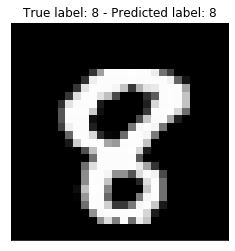

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

idx = random.randint(0, len(x_test) - 1)
image = x_test[idx]
label = y_test[idx]

pred = model(image[np.newaxis,:,:]).numpy().squeeze()
pred_label = pred.argmax()

plt.figure()
plt.imshow(image, cmap='gray')
plt.title('True label: {} - Predicted label: {}'.format(label, pred_label))
plt.xticks([])
plt.yticks([])
plt.show()

Để biết xác suất của label ta có thể sử dụng cách sau:

In [0]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
pred = probability_model(image[np.newaxis,:,:]).numpy().squeeze()
print(pred.max())

0.9990693


In [0]:
tf.keras.losses.SparseCategoricalCrossentropy?